In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)

In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "iclr2024experiments"  # set to your entity and project 
all_sweeps = [
    # "vae_sweep_0_50k", "vae_sweep_015_50k", "vae_sweep_30_50k", "vae_sweep_60_50k", "vae_sweep_90_50k", "vae_sweep_120_50k", "vae_sweep_150_50k", "vae_sweep_180_50k",
    "vae_sweep_000_50k_v2", "vae_sweep_015_50k_v2", "vae_sweep_090_50k_v2", "vae_sweep_180_50k_v2",
    "vae_sweep_000_37k5", "vae_sweep_015_37k5", "vae_sweep_090_37k5", "vae_sweep_180_37k5",
    "vae_sweep_000_25k", "vae_sweep_015_25k", "vae_sweep_030_25k", "vae_sweep_060_25k", "vae_sweep_090_25k", "vae_sweep_120_25k", "vae_sweep_150_25k", "vae_sweep_180_25k",
    # "augvae_sweep_000_50k", "augvae_sweep_015_50k", "augvae_sweep_030_50k", "augvae_sweep_060_50k", "augvae_sweep_090_50k", "augvae_sweep_120_50k", "augvae_sweep_150_50k", "augvae_sweep_180_50k",
    "augvae_sweep_000_50k_v2", "augvae_sweep_015_50k_v2", "augvae_sweep_090_50k_v2", "augvae_sweep_180_50k_v2",
    "augvae_sweep_000_37k5", "augvae_sweep_015_37k5", "augvae_sweep_090_37k5", "augvae_sweep_180_37k5",
    "augvae_sweep_000_25k", "augvae_sweep_015_25k", "augvae_sweep_030_25k", "augvae_sweep_060_25k", "augvae_sweep_090_25k", "augvae_sweep_120_25k", "augvae_sweep_150_25k", "augvae_sweep_180_25k",
    # "vae_sweep_0_15k", "vae_sweep_015_15k", "vae_sweep_30_15k", "vae_sweep_60_15k", "vae_sweep_90_15k", "vae_sweep_120_15k", "vae_sweep_150_15k", "vae_sweep_180_15k",
    # "vae_sweep_0_5k", "vae_sweep_015_5k", "vae_sweep_30_5k", "vae_sweep_60_5k", "vae_sweep_90_5k", "vae_sweep_120_5k", "vae_sweep_150_5k", "vae_sweep_180_5k",
]

In [3]:
# create dict mapping sweep name to sweep id
sweep_id_dict = {}
for sweep in api.project(project).sweeps():
    if sweep.name in all_sweeps:
        sweep_id_dict[sweep.name] = sweep.id

sweep_id_dict

{'augvae_sweep_090_50k_v2': '2ohwxqk0',
 'augvae_sweep_180_50k_v2': 'i73gr3g5',
 'augvae_sweep_015_50k_v2': 'mhul3ko0',
 'augvae_sweep_000_50k_v2': 'qebkl364',
 'vae_sweep_180_50k_v2': 'gsygji59',
 'vae_sweep_090_50k_v2': 'brhzt2cc',
 'vae_sweep_015_50k_v2': 'mwxzfuiy',
 'vae_sweep_000_50k_v2': 'pmpifkwd',
 'vae_sweep_000_37k5': '0xeu5lc2',
 'vae_sweep_015_37k5': '5aibyjy7',
 'vae_sweep_090_37k5': 'a9g18qak',
 'vae_sweep_180_37k5': '5wb76az3',
 'augvae_sweep_000_37k5': 'v8f60vrf',
 'augvae_sweep_015_37k5': 'n0xdsfda',
 'augvae_sweep_090_37k5': '0vtbm6d7',
 'augvae_sweep_180_37k5': 'nnovxgk3',
 'augvae_sweep_000_25k': 'yma752k1',
 'augvae_sweep_015_25k': '2s8qbm7n',
 'augvae_sweep_030_25k': '68hhtxss',
 'augvae_sweep_060_25k': 'cjs0hkal',
 'augvae_sweep_090_25k': 'vwlw3507',
 'augvae_sweep_120_25k': 'wygyf754',
 'augvae_sweep_150_25k': 'qd5i9g3m',
 'augvae_sweep_180_25k': 'z59y5d11',
 'vae_sweep_180_25k': 'ytfclrqe',
 'vae_sweep_150_25k': 'vrceu8ot',
 'vae_sweep_120_25k': 'pxjxts1g',
 '

In [4]:
summary_list, config_list, name_list, tags, ids, states, sweeps = [], [], [], [], [], [],  []

for sweep in all_sweeps:
    runs = api.sweep(entity + "/" + project + "/" + sweep_id_dict[sweep]).runs

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

        tags.append(run.tags)

        ids.append(run.id)

        states.append(run.state)

        sweeps.append(sweep)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    "sweep": sweeps,
    })

runs_df

summary  \
0     {'train/elbo': 1396.0018310546875, 'train/loss...   
1     {'_wandb': {'runtime': 399}, 'train/loss': -10...   
2     {'valid/ll': 1130.1947021484375, 'valid/kld': ...   
3     {'sample': {'_type': 'image-file', 'width': 40...   
4     {'_step': 15000, 'recon': {'path': 'media/imag...   
...                                                 ...   
1019  {'_wandb': {'runtime': 911}, 'valid/ll': 1105....   
1020  {'valid/ll': 848.0750122070312, 'proto_plots_3...   
1021  {'train/loss': 315.79583740234375, 'valid/iwlb...   
1022  {'gen_plots_4': {'size': 62861, '_type': 'imag...   
1023  {'_step': 15000, 'recon': {'path': 'media/imag...   

                                                 config                name  \
0     {'lr': 0.008845061061290668, 'seed': 0, 'angle...  efficient-sweep-32   
1     {'lr': 0.008984981239098242, 'seed': 0, 'angle...     frosty-sweep-31   
2     {'lr': 0.009146695700970727, 'seed': 0, 'angle...       soft-sweep-30   
3     {'lr': 0.008545908541371534, 'seed': 0, 'angle...      quiet-sweep-29   
4     {'lr': 0.004015113142057892, 'seed': 0, 'angle...      laced-sweep-28   
...                                                 ...                 ...   
1019  {'lr': 0.001510100440549317, 'seed': 0, 'angle...        dark-sweep-5   
1020  {'lr': 0.0013167486362549727, 'seed': 0, 'angl...       major-sweep-4   
1021  {'lr': 0.00016986401140037355, 'seed': 0, 'ang...        wild-sweep-3   
1022  {'lr': 0.00015690222804651448, 'seed': 0, 'ang...       sandy-sweep-2   
1023  {'lr': 0.001687353552859025, 'seed': 0, 'angle...        mild-sweep-1   

     tags        id     state                 sweep  
0      []  jf6u0jzo  finished  vae_sweep_000_50k_v2  
1      []  tlxfmbb8  finished  vae_sweep_000_50k_v2  
2      []  bskj6axs  finished  vae_sweep_000_50k_v2  
3      []  cjnvuwtf  finished  vae_sweep_000_50k_v2  
4      []  sbu2p5tp  finished  vae_sweep_000_50k_v2  
...   ...       ...       ...                   ...  
1019   []  fu068phs  finished  augvae_sweep_180_25k  
1020   []  ililtxip  finished  augvae_sweep_180_25k  
1021   []  akrpg1d7  finished  augvae_sweep_180_25k  
1022   []  mpg6dtub  finished  augvae_sweep_180_25k  
1023   []  6nwri7gd  finished  augvae_sweep_180_25k  

[1024 rows x 7 columns]

In [5]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'sweep', 'summary.train/elbo',
       'summary.train/loss', 'summary.lr', 'summary.valid/ll',
       'summary.valid/kld',
       ...
       'config.iwlb_num_samples', 'config.warmup_steps_pct',
       'config.shuffle_buffer_size', 'config.repeat_after_batching',
       'config.β_schedule_init_value', 'config.β_schedule_final_value',
       'config.model.conv_dims', 'config.model.dense_dims', 'config.clip_norm',
       'config.weight_decay'],
      dtype='object', length=198)

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs with certain tags
# tags_to_keep = ['angle_sweep', 'num_trn_sweep', 'mnist', 'vae']
# df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
# tags_to_remove = ['test', 'hidden', 'ssilvae']
# df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

df_filtered

name tags        id     state                 sweep  \
0     efficient-sweep-32   []  jf6u0jzo  finished  vae_sweep_000_50k_v2   
1        frosty-sweep-31   []  tlxfmbb8  finished  vae_sweep_000_50k_v2   
2          soft-sweep-30   []  bskj6axs  finished  vae_sweep_000_50k_v2   
3         quiet-sweep-29   []  cjnvuwtf  finished  vae_sweep_000_50k_v2   
4         laced-sweep-28   []  sbu2p5tp  finished  vae_sweep_000_50k_v2   
...                  ...  ...       ...       ...                   ...   
1019        dark-sweep-5   []  fu068phs  finished  augvae_sweep_180_25k   
1020       major-sweep-4   []  ililtxip  finished  augvae_sweep_180_25k   
1021        wild-sweep-3   []  akrpg1d7  finished  augvae_sweep_180_25k   
1022       sandy-sweep-2   []  mpg6dtub  finished  augvae_sweep_180_25k   
1023        mild-sweep-1   []  6nwri7gd  finished  augvae_sweep_180_25k   

      summary.train/elbo  summary.train/loss    summary.lr  summary.valid/ll  \
0            1396.001831        -1396.001831  5.839523e-06       1157.603516   
1            1015.256714        -1015.256714  7.189163e-05        944.268616   
2            1226.723145        -1226.723145  5.198382e-03       1130.194702   
3            1295.319824        -1295.319824  3.509000e-03       1146.428345   
4            1279.192139        -1279.192139  4.142825e-09       1142.477905   
...                  ...                 ...           ...               ...   
1019          998.338196         -998.338196  7.456225e-08       1105.915405   
1020          741.526794         -741.526794  5.910671e-08        848.075012   
1021         -315.795837          315.795837  2.681229e-10       -283.799957   
1022            5.429184           -5.429184  2.726915e-09         44.945965   
1023          791.791260         -791.791260  3.046341e-07        891.860352   

      summary.valid/kld  summary._step  summary._runtime  summary.train/kld  \
0             64.316177        15000.0        992.673495          64.224701   
1             29.870279         5000.0        399.958517          29.829313   
2             59.777420        20000.0       1131.645993          59.587376   
3             54.121441        10000.0        676.601323          54.120037   
4             59.145420        15000.0       1008.043256          59.043499   
...                 ...            ...               ...                ...   
1019          63.758945        15000.0        911.591303          64.413368   
1020          30.504301        15000.0        921.783711          30.779943   
1021          32.678059        10000.0        830.341347          32.933392   
1022          40.925449        20000.0       1125.272040          41.149273   
1023          40.994278        15000.0       1007.285647          41.481998   

      summary.valid/elbo  summary.valid/iwlb  summary.valid/loss  summary.β  \
0            1093.287109                 NaN        -1093.287109        1.0   
1             914.398560                 NaN         -914.398560        1.0   
2            1070.417236                 NaN        -1070.417236        1.0   
3            1092.306641                 NaN        -1092.306641        1.0   
4            1083.332397                 NaN        -1083.332397        1.0   
...                  ...                 ...                 ...        ...   
1019         1042.156006                 NaN        -1042.156006        1.0   
1020          817.570801                 NaN         -817.570801        1.0   
1021         -316.477997                 NaN          316.477997        1.0   
1022            4.020517                 NaN           -4.020517        1.0   
1023          850.866028                 NaN         -850.866028        1.0   

      summary.train/ll  summary._timestamp  summary.train/iwlb  \
0          1460.233521        1.700442e+09                 NaN   
1          1045.086304        1.700441e+09                 NaN   
2          1286.314209        1.700441e+09                 NaN

In [7]:
df_filtered['config.angle'].unique()

array([  0.,  15.,  90., 180.,  30.,  60., 120., 150.])

In [8]:
df_filtered['config.steps'].unique()

array([15000,  5000, 20000, 10000,  2500])

In [9]:
df_filtered['config.num_trn'].unique()

array([50000., 37500., 25000.])

In [10]:
# create a new column which indicates the model type
# this can be infered from the sweep name. The sweep name is either "vae_sweep_xxx" or "augvae_sweep_xxx"
# where "vae" and "augvae" are the model names
df_filtered['model_type'] = df_filtered['sweep'].apply(lambda x: x.split('_')[0])


df_filtered['model_type'].unique()

/tmp/ipykernel_1574001/782701037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['model_type'] = df_filtered['sweep'].apply(lambda x: x.split('_')[0])


array(['vae', 'augvae'], dtype=object)

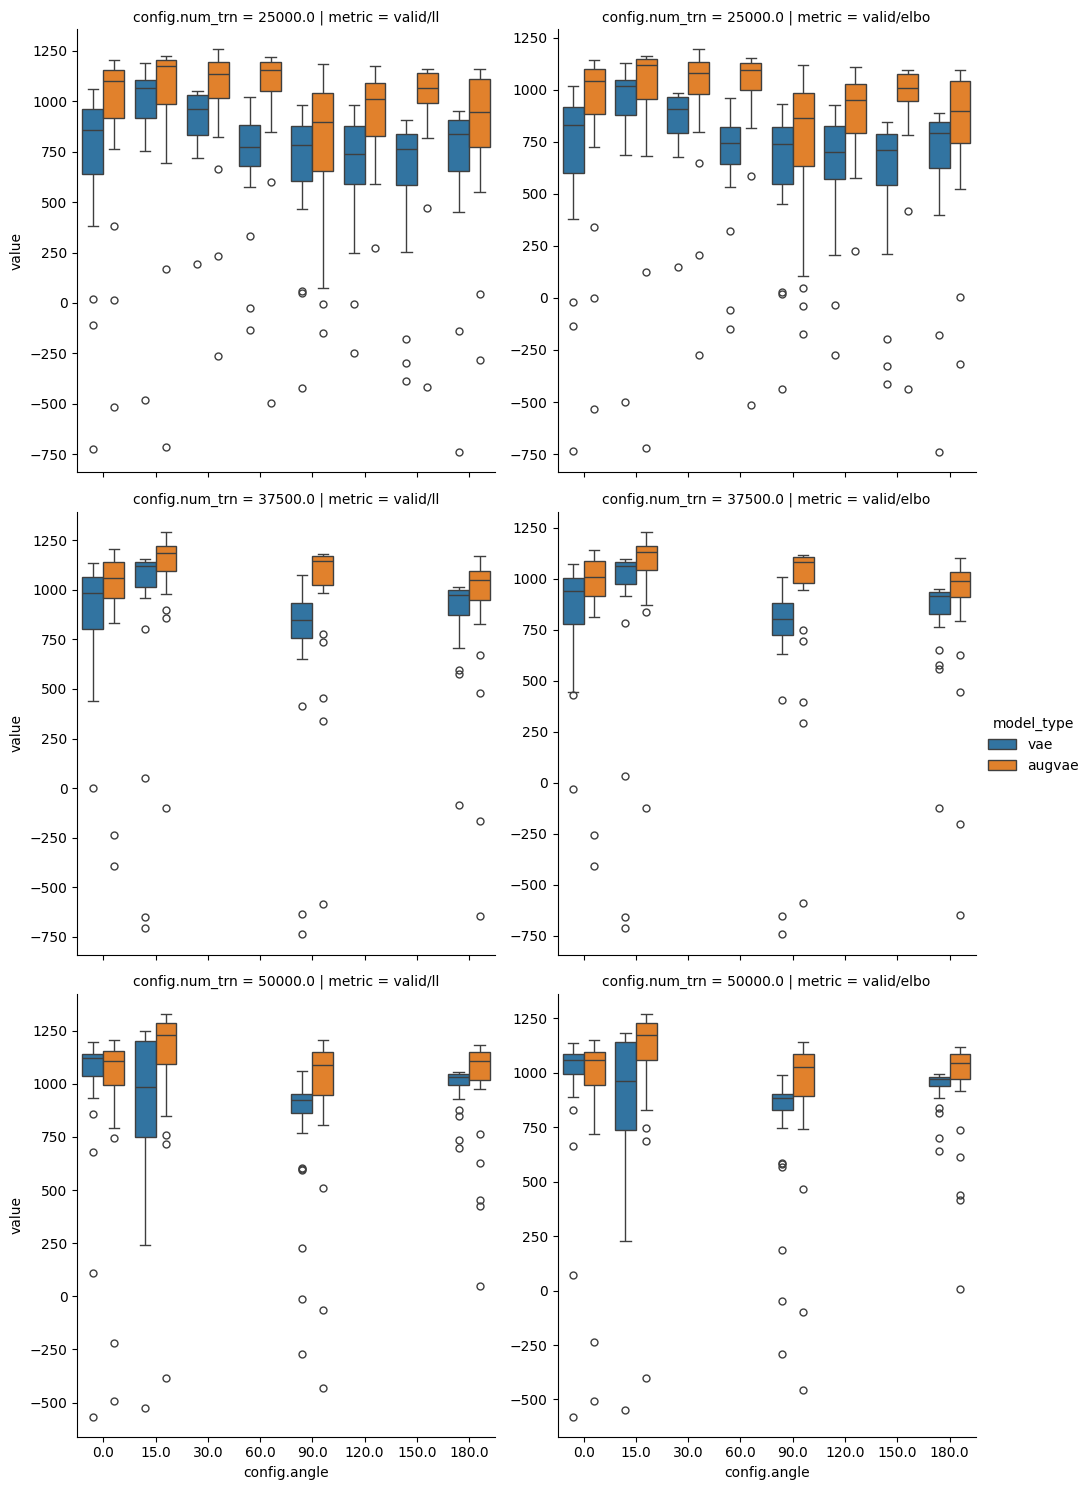

In [11]:
plot_df = df_filtered[[
    'summary.valid/ll', 'summary.valid/elbo', 'config.angle',  'config.num_trn', 'model_type'
]]

# take only some settings
# plot_df = plot_df[
#     plot_df['config.init_lr'].isin([0.0003])
# ]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'model_type'],
    value_vars=['summary.valid/ll', 'summary.valid/elbo'],
    var_name='metric',
    value_name='value'
)

# remove the 'summary.' prefix from the metric names
plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')


# g = sns.relplot(
#     x="config.angle", y="value", hue="metric",
#     markers=True,
#     # palette=sns.color_palette('viridis', as_cmap=True),
#     kind="line",
#     facet_kws=dict(sharey=False, sharex=False),
#     data=plot_df
# )
# # g.set_axis_labels('Rotation angle', 'Best validation log-likelihood')
# # g.set_titles('Total steps: {col_name}')
# for axs in g.axes:
#     for ax in axs:
#         # ax.set(xscale="symlog")
#         ax.set_xticks(plot_df['config.angle'].unique())
#         ax.set_xticklabels(plot_df['config.angle'].unique(), rotation=45)
#         # ax.set_xlim(-.1, 385)
# plt.show()

sns.catplot(data=plot_df, x="config.angle", y="value", col="metric", row='config.num_trn', hue='model_type', kind="box", showfliers=True, sharey=False)

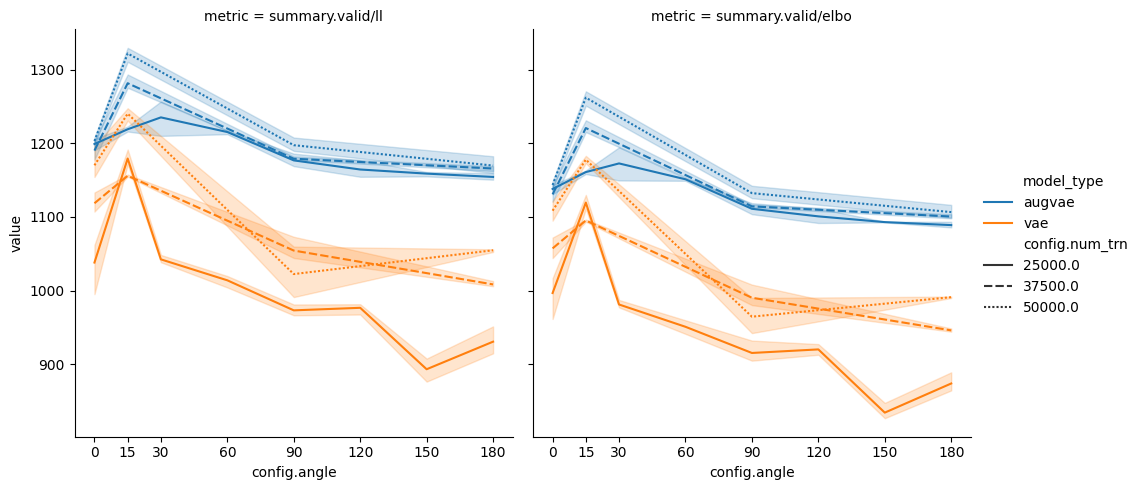

In [12]:
# take only the top 4 runs for each sweep
plot_df = df_filtered.groupby(
    'sweep').apply(
    lambda x: x.nlargest(3, 'summary.valid/elbo')).reset_index(drop=True)[[
    'summary.valid/ll', 'summary.valid/elbo', 'config.angle', 'config.num_trn', 'model_type',
]]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'model_type',],
    value_vars=['summary.valid/ll', 'summary.valid/elbo'],
    var_name='metric',
    value_name='value'
)

# filter the plot df to only include results for config.num_trn == 25000
# plot_df = plot_df[plot_df['config.num_trn'] == 50000]

g = sns.relplot(data=plot_df, x="config.angle", y="value", hue='model_type', col="metric", style='config.num_trn', kind='line', facet_kws={'sharey': True})

g.set(xticks=[0, 15, 30, 60, 90, 120, 150, 180])

g

## Analize sweeps

In [13]:
df_filtered

name tags        id     state                 sweep  \
0     helpful-sweep-32   []  xwqm4lp2  finished       vae_sweep_0_50k   
1     dashing-sweep-31   []  n7hrmuan  finished       vae_sweep_0_50k   
2        wild-sweep-30   []  bb8qu8ue  finished       vae_sweep_0_50k   
3      dulcet-sweep-29   []  b0568v55  finished       vae_sweep_0_50k   
4      devout-sweep-28   []  fpaqn98t  finished       vae_sweep_0_50k   
...                ...  ...       ...       ...                   ...   
1275      dark-sweep-5   []  fu068phs  finished  augvae_sweep_180_25k   
1276     major-sweep-4   []  ililtxip  finished  augvae_sweep_180_25k   
1277      wild-sweep-3   []  akrpg1d7  finished  augvae_sweep_180_25k   
1278     sandy-sweep-2   []  mpg6dtub  finished  augvae_sweep_180_25k   
1279      mild-sweep-1   []  6nwri7gd  finished  augvae_sweep_180_25k   

      summary._timestamp  summary.train/elbo  summary.train/iwlb  \
0           1.698782e+09         1204.111816                 NaN   
1           1.698781e+09         1248.200806                 NaN   
2           1.698780e+09         1266.047607                 NaN   
3           1.698779e+09         1275.610718                 NaN   
4           1.698779e+09         1207.370239                 NaN   
...                  ...                 ...                 ...   
1275        1.699546e+09          998.338196                 NaN   
1276        1.699545e+09          741.526794                 NaN   
1277        1.699544e+09         -315.795837                 NaN   
1278        1.699543e+09            5.429184                 NaN   
1279        1.699542e+09          791.791260                 NaN   

      summary.valid/iwlb    summary.lr  summary._step  summary.valid/ll  \
0                    NaN  1.925580e-03        15000.0       1108.341797   
1                    NaN  1.028712e-06        20000.0       1152.557739   
2                    NaN  2.483375e-06        20000.0       1149.951050   
3                    NaN  2.212810e-06        15000.0       1158.655396   
4                    NaN  1.520541e-07        20000.0       1107.386230   
...                  ...           ...            ...               ...   
1275                 NaN  7.456225e-08        15000.0       1105.915405   
1276                 NaN  5.910671e-08        15000.0        848.075012   
1277                 NaN  2.681229e-10        10000.0       -283.799957   
1278                 NaN  2.726915e-09        20000.0         44.945965   
1279                 NaN  3.046341e-07        15000.0        891.860352   

      summary.valid/loss  summary.train/kld  summary.train/loss  \
0           -1048.430908          60.216228        -1204.111816   
1           -1092.708252          59.748978        -1248.200806   
2           -1089.023193          60.867573        -1266.047607   
3           -1097.127075          61.455910        -1275.610718   
4           -1056.914917          50.398609        -1207.370239   
...                  ...                ...                 ...   
1275        -1042.156006          64.413368         -998.338196   
1276         -817.570801          30.779943         -741.526794   
1277          316.477997          32.933392          315.795837   
1278           -4.020517          41.149273           -5.429184   
1279         -850.866028          41.481998         -791.791260   

      summary._runtime  summary.valid/kld  summary.β  summary.train/ll  \
0           656.430763          59.911114        1.0       1264.328979   
1           822.287345          59.849583        1.0       1307.951660   
2           824.237935          60.927753        1.0       1326.920166   
3           660.724108          61.528339        1.0       1337.066895   
4          1789.066197          50.470924        1.0       1257.780518   
...                ...                ...        ...               ...   
1275        911.591303          63.758945        1.0       1062.758179   
1276        921.783711    

In [14]:
# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
hyper_names = ['config.lr', 'config.steps', 'config.init_lr_mult', 'config.final_lr_mult', 'config.warmup_steps_pct', 'config.β_schedule_init_value', 'config.model.conv_dims', 'config.model.dense_dims']
df = df_filtered.melt(
    id_vars=['config.angle', 'config.num_trn', 'model_type',] + hyper_names,
    value_vars=['summary.valid/ll', 'summary.valid/elbo'],
    var_name='metric',
    value_name='value'
)

df

config.angle  config.num_trn model_type  config.lr  config.steps  \
0              0.0         50000.0        vae   0.001999         15000   
1              0.0         50000.0        vae   0.004486         20000   
2              0.0         50000.0        vae   0.002536         20000   
3              0.0         50000.0        vae   0.005427         15000   
4              0.0         50000.0        vae   0.002579         20000   
...            ...             ...        ...        ...           ...   
2553         180.0         25000.0     augvae   0.001510         15000   
2554         180.0         25000.0     augvae   0.001317         15000   
2555         180.0         25000.0     augvae   0.000170         10000   
2556         180.0         25000.0     augvae   0.000157         20000   
2557         180.0         25000.0     augvae   0.001687         15000   

      config.init_lr_mult  config.final_lr_mult  config.warmup_steps_pct  \
0                0.932166              0.963068                 0.272277   
1                0.970796              0.000229                 0.268467   
2                0.059725              0.000979                 0.295920   
3                0.315773              0.000408                 0.278707   
4                0.919987              0.000059                 0.223019   
...                   ...                   ...                      ...   
2553             0.151766              0.000049                 0.224987   
2554             0.077499              0.000045                 0.220800   
2555             0.003466              0.000002                 0.251059   
2556             0.002157              0.000017                 0.235106   
2557             0.204669              0.000181                 0.283857   

      config.β_schedule_init_value config.model.conv_dims  \
0                         1.189708                 64,128   
1                         1.392449                 64,128   
2                         1.916997                 64,128   
3                         1.056956                 64,128   
4                         3.887754                 64,128   
...                            ...                    ...   
2553                      2.163880             64,128,256   
2554                      6.267435             64,128,256   
2555                      5.386486             64,128,256   
2556                      6.923270                128,256   
2557                      3.193829                128,256   

     config.model.dense_dims              metric        value  
0                        256    summary.valid/ll  1108.341797  
1                        128    summary.valid/ll  1152.557739  
2                        256    summary.valid/ll  1149.951050  
3                        256    summary.valid/ll  1158.655396  
4                        128    summary.valid/ll  1107.386230  
...                      ...                 ...          ...  
2553                     128  summary.valid/elbo  1042.156006  
2554                  128,64  summary.valid/elbo   817.570801  
2555                     256  summary.valid/elbo  -316.477997  
2556                     128  summary.valid/elbo     4.020517  
2557                  128,64  summary.valid/elbo   850.866028  

[2558 rows x 13 columns]

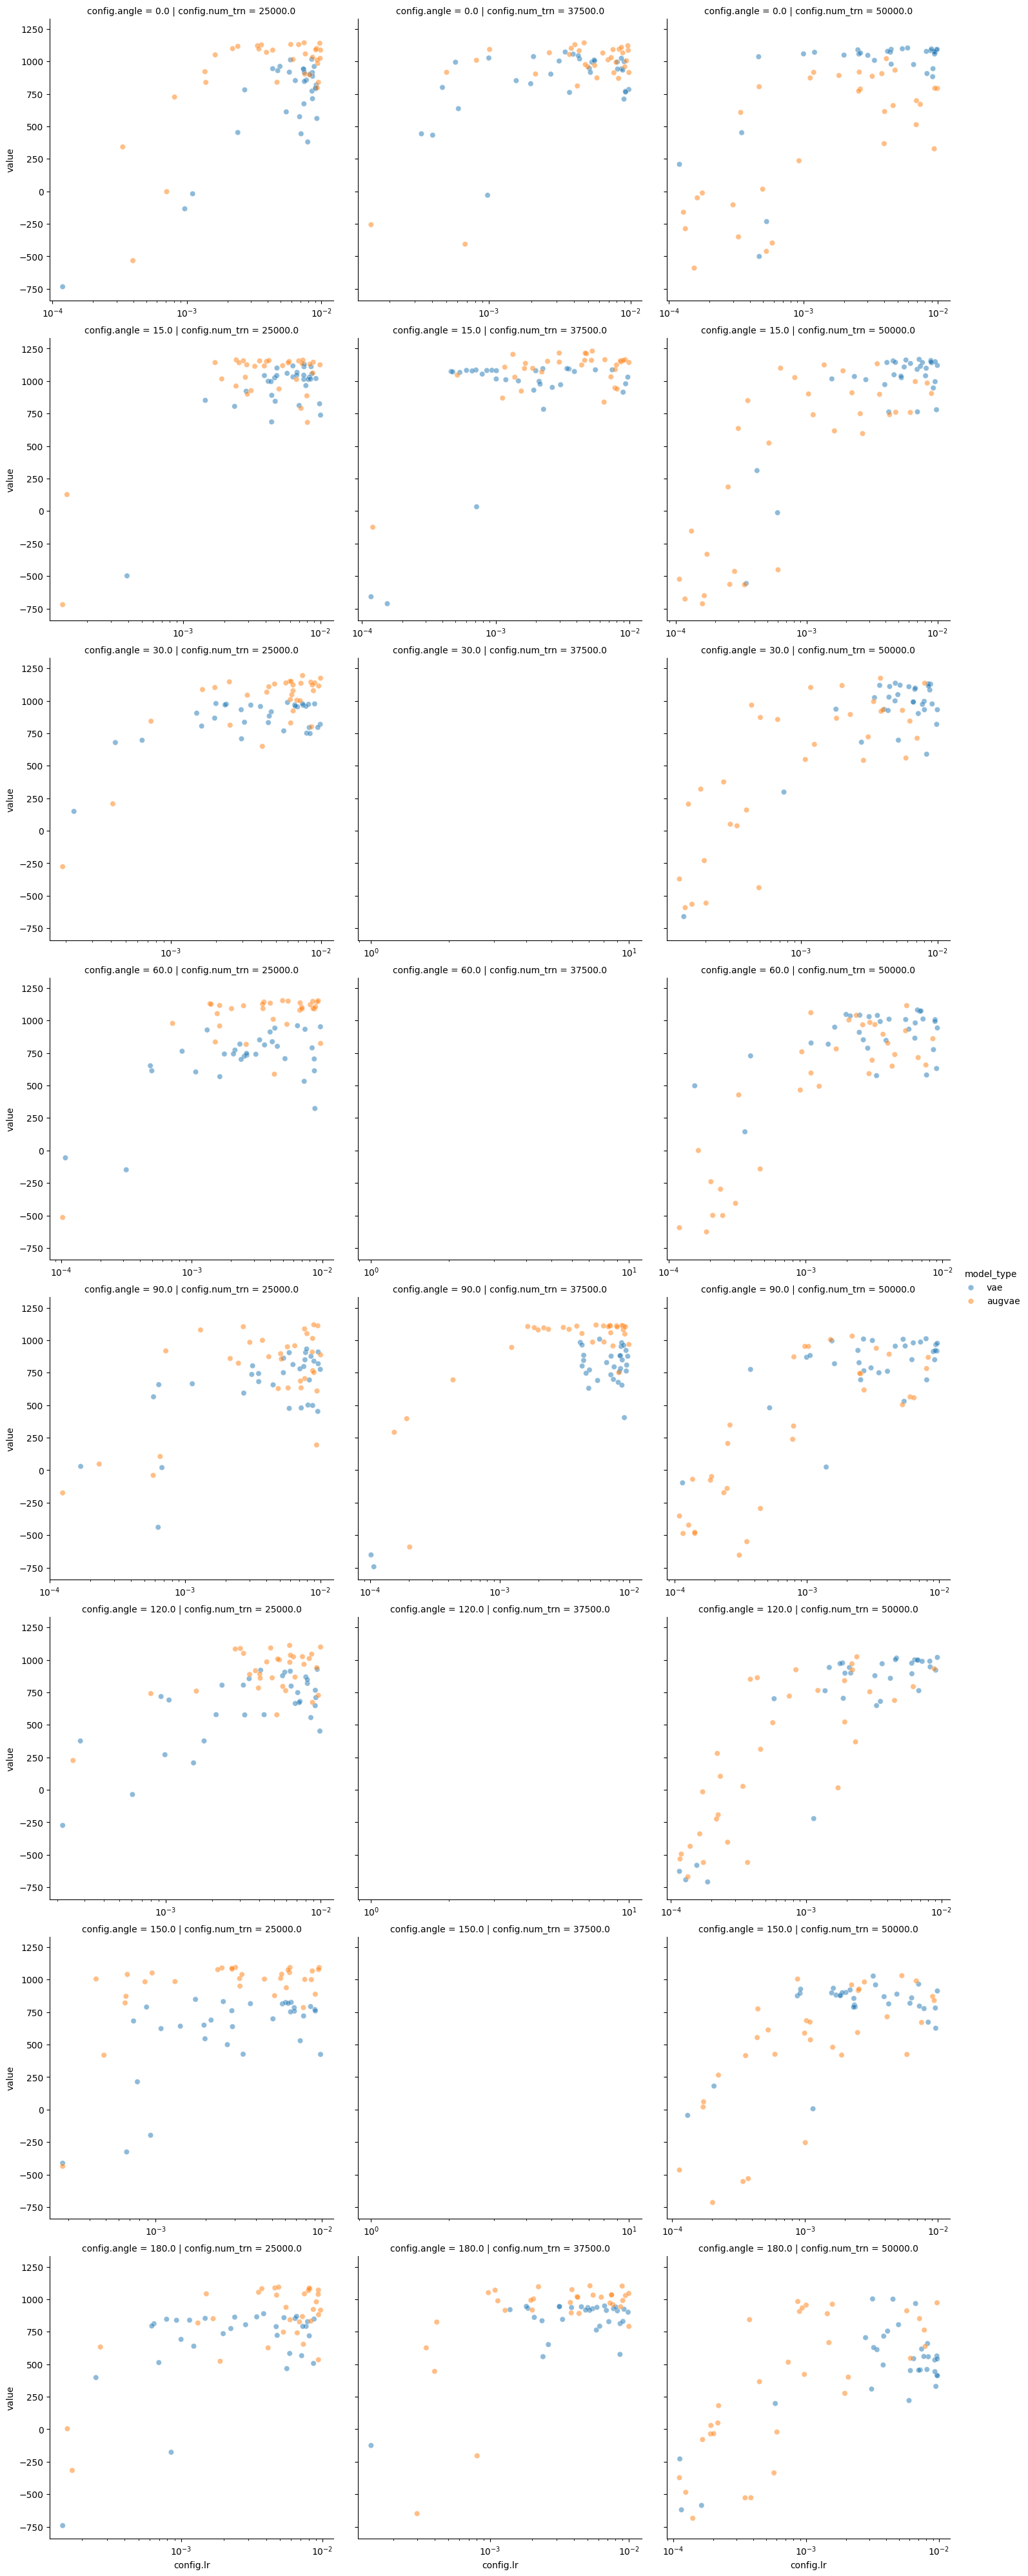

In [23]:
g = sns.relplot(
    data=df[df.metric == 'summary.valid/elbo'],
    x="config.lr",
    y="value",
    row="config.angle", col='config.num_trn', hue='model_type',
    kind="scatter",
    facet_kws={'sharex': False},
    alpha=0.5)

g.set(xscale="log")

g

In almost all cases, we see that LRs less than 10e-3 perform poorly. Perhaps we could just have 2 options: 3e-3, 1e-2?

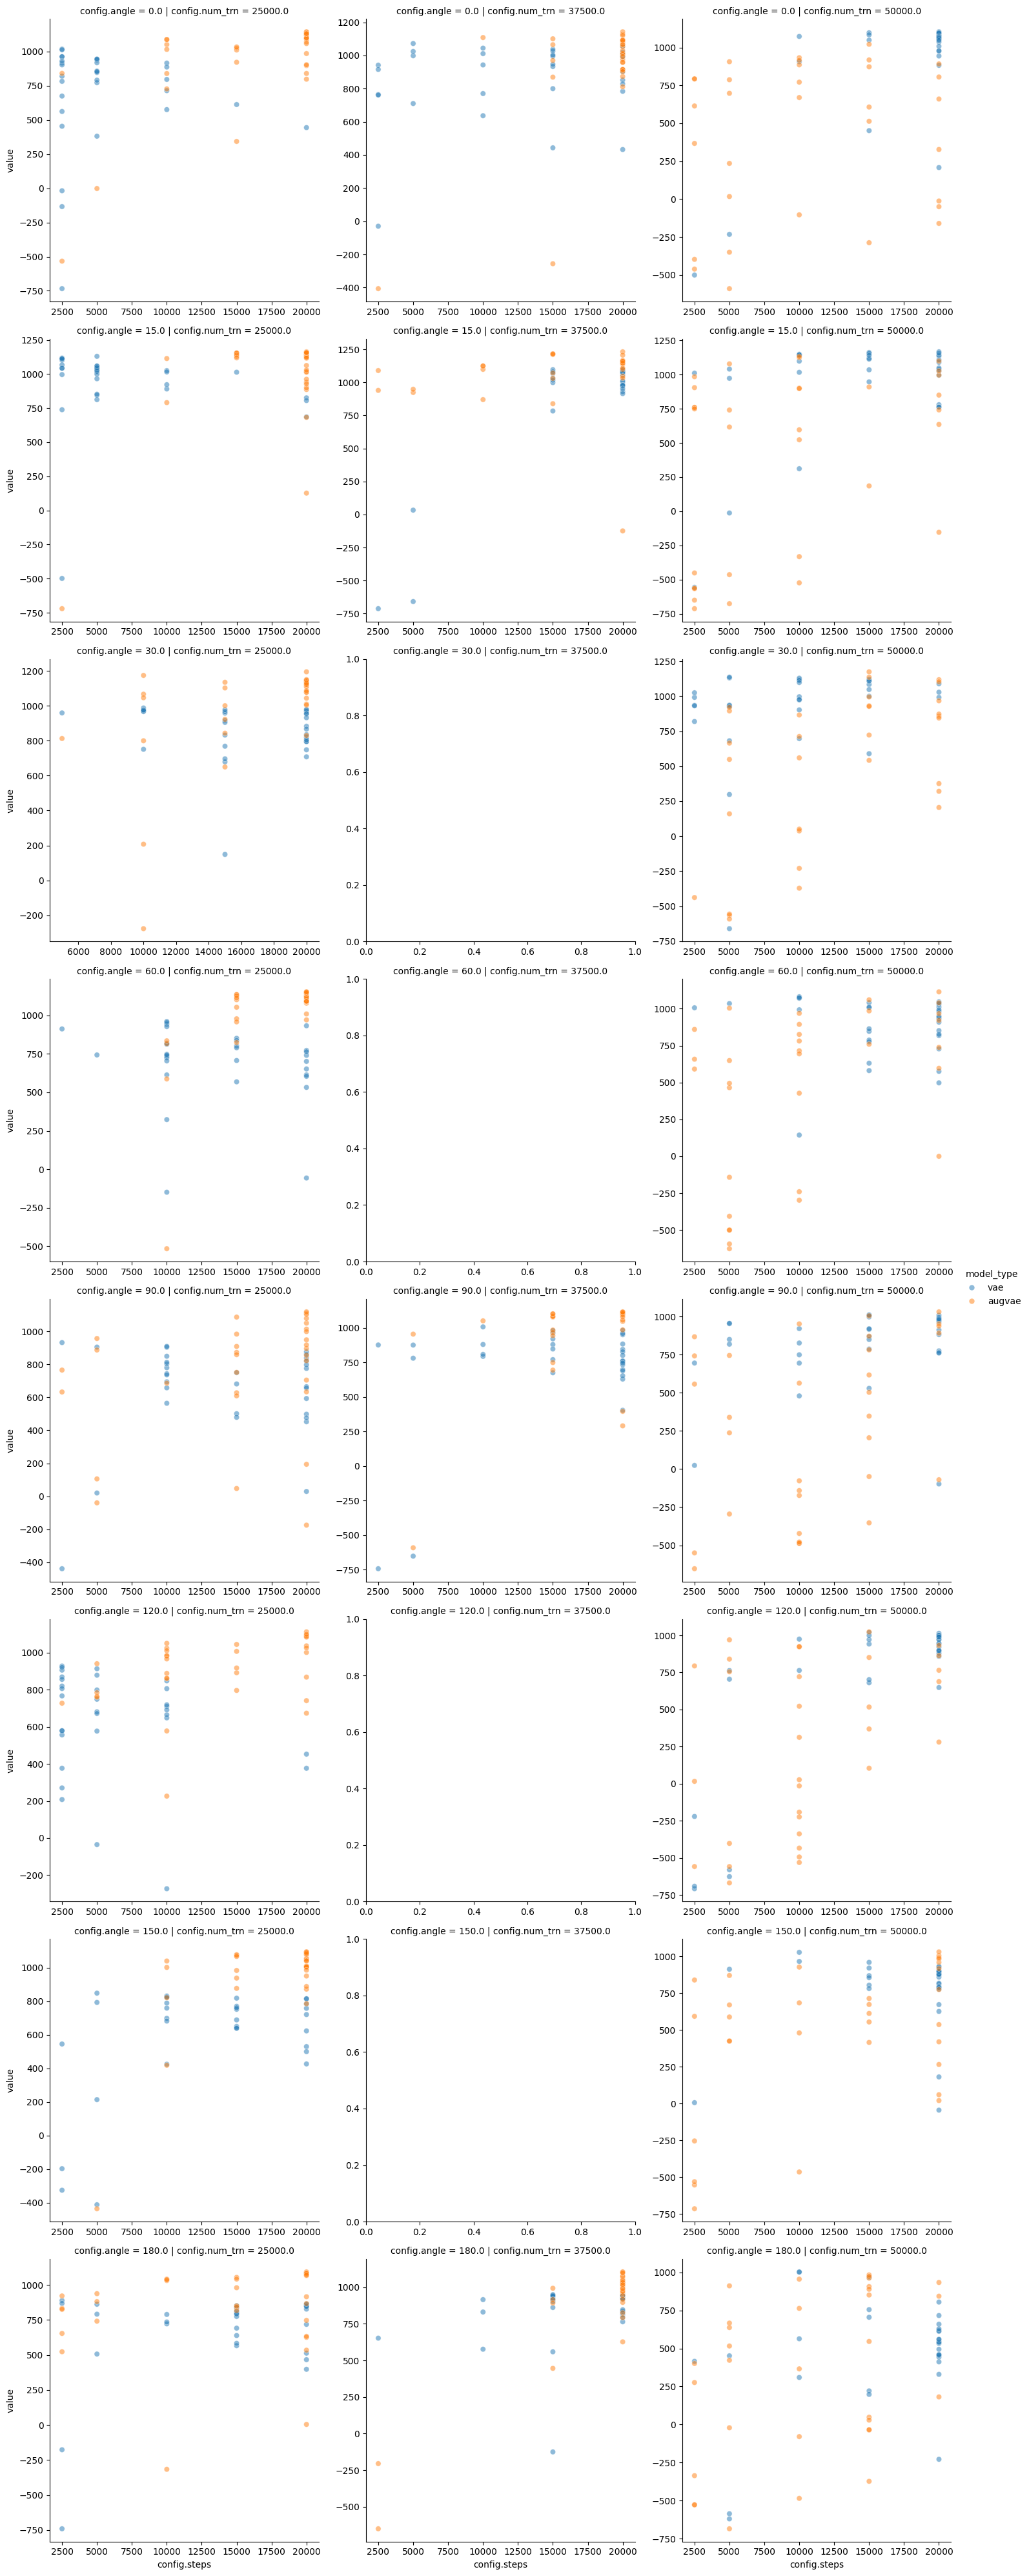

In [22]:
sns.relplot(
    data=df[df.metric == 'summary.valid/elbo'],
    x="config.steps",
    y="value",
    row="config.angle", col='config.num_trn', hue='model_type',
    kind="scatter",
    facet_kws={'sharex': False, 'sharey': False},
    alpha=0.5)

2500 can be removed, since performance is usuall very similar to 5000. Similary, 15000 can be removed, since performance is usually very similar to 10000 and/or 20000.

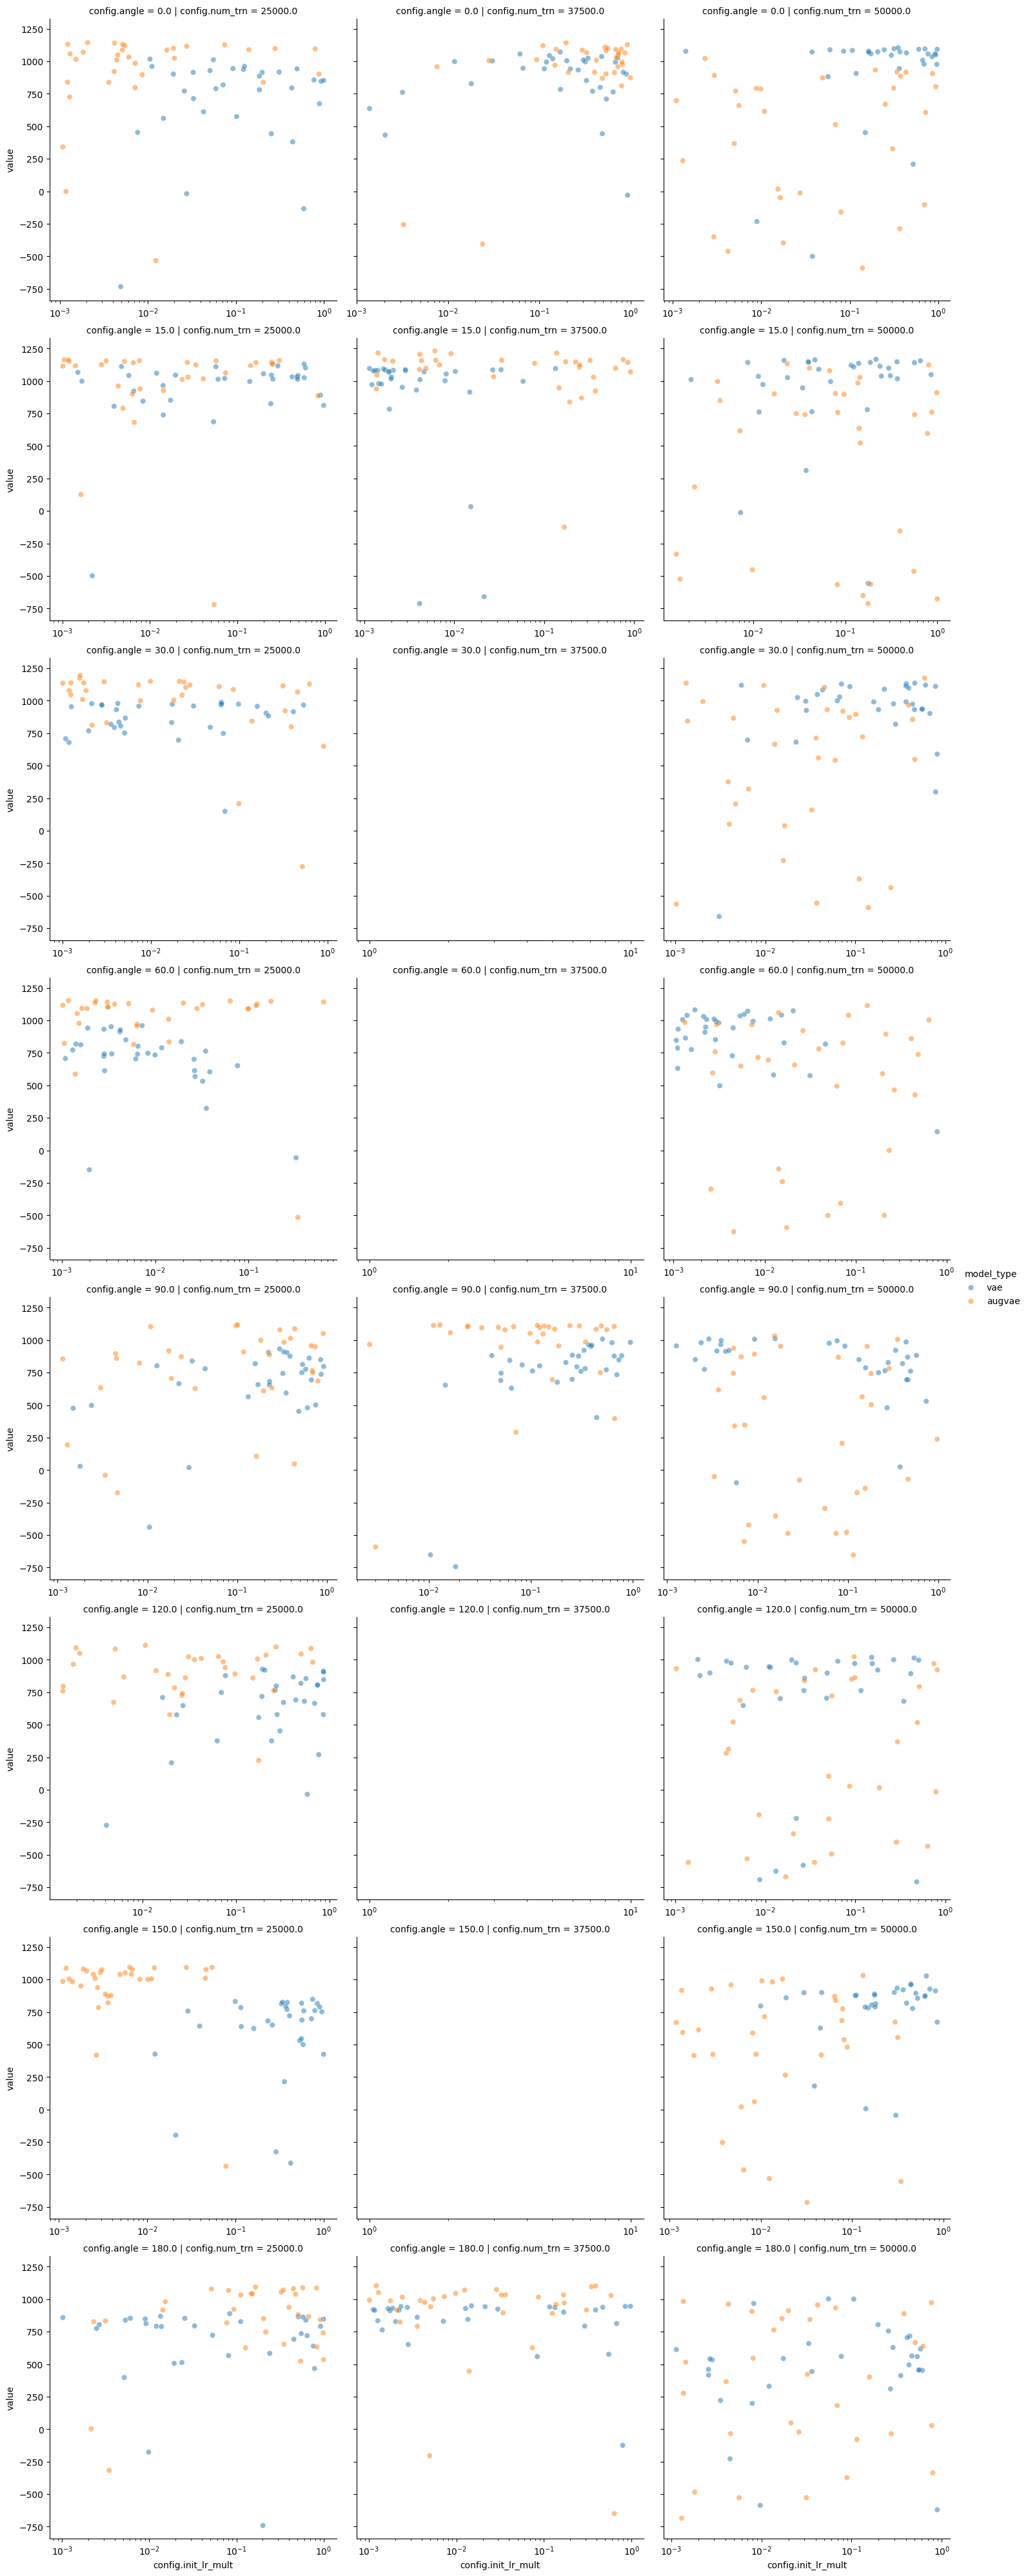

In [25]:
g = sns.relplot(
    data=df[df.metric == 'summary.valid/elbo'],
    x="config.init_lr_mult",
    y="value",
    row="config.angle", col='config.num_trn', hue='model_type',
    kind="scatter",
    facet_kws={'sharex': False},
    alpha=0.5)

g.set(xscale="log")

g

Seems to have a limited effect. Perhaps just limit sweep to 10e-2 and 10e-1?

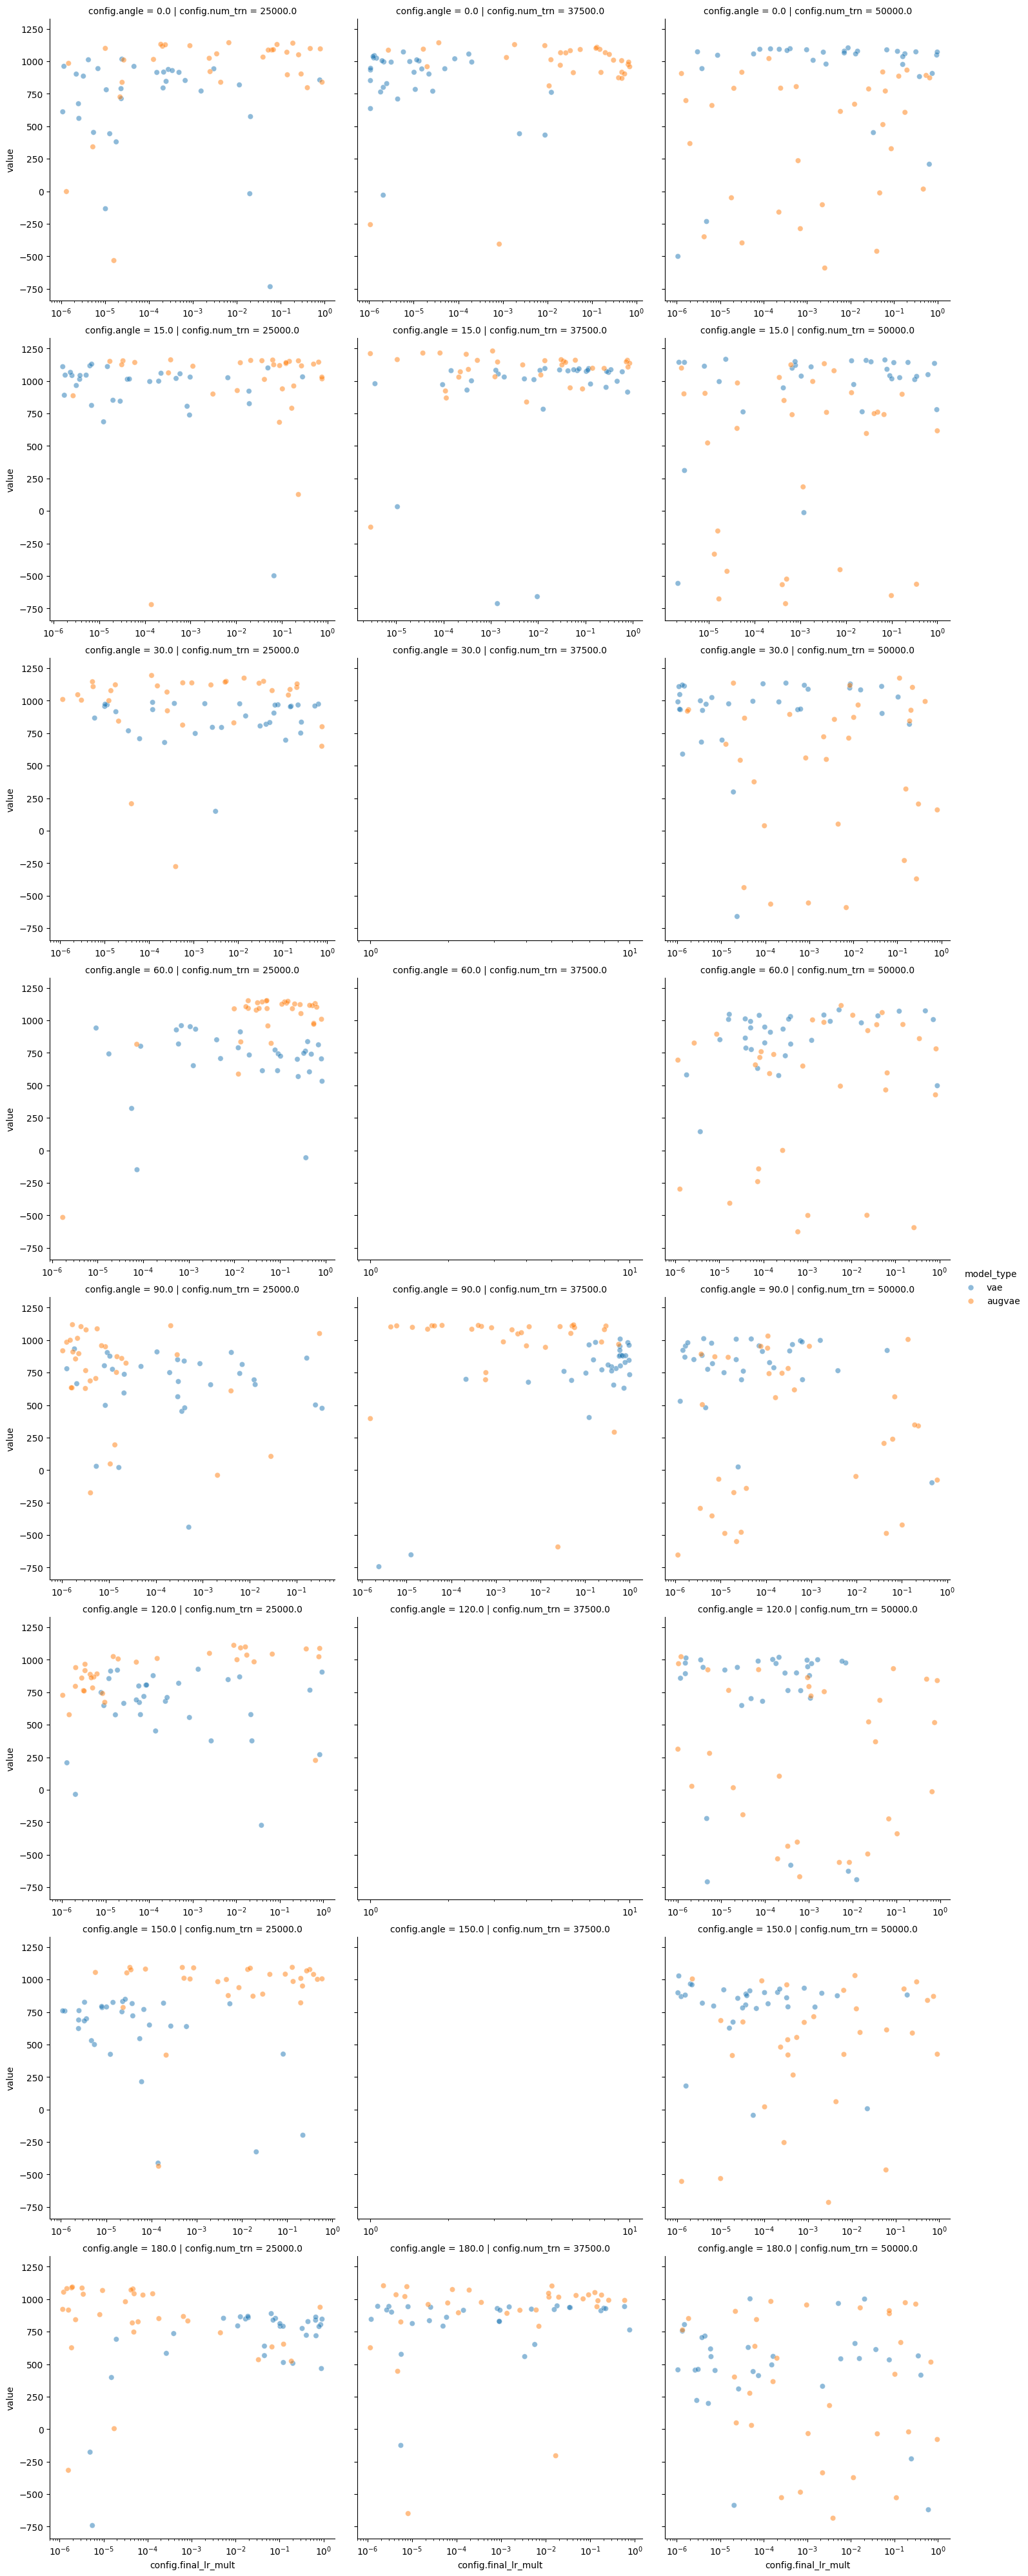

In [26]:
g = sns.relplot(
    data=df[df.metric == 'summary.valid/elbo'],
    x="config.final_lr_mult",
    y="value",
    row="config.angle", col='config.num_trn', hue='model_type',
    kind="scatter",
    facet_kws={'sharex': False},
    alpha=0.5)

g.set(xscale="log")

g

Doesn't seem to have a large impact. Maybe reduce to 2 options: 10e-2 and 10e-4?

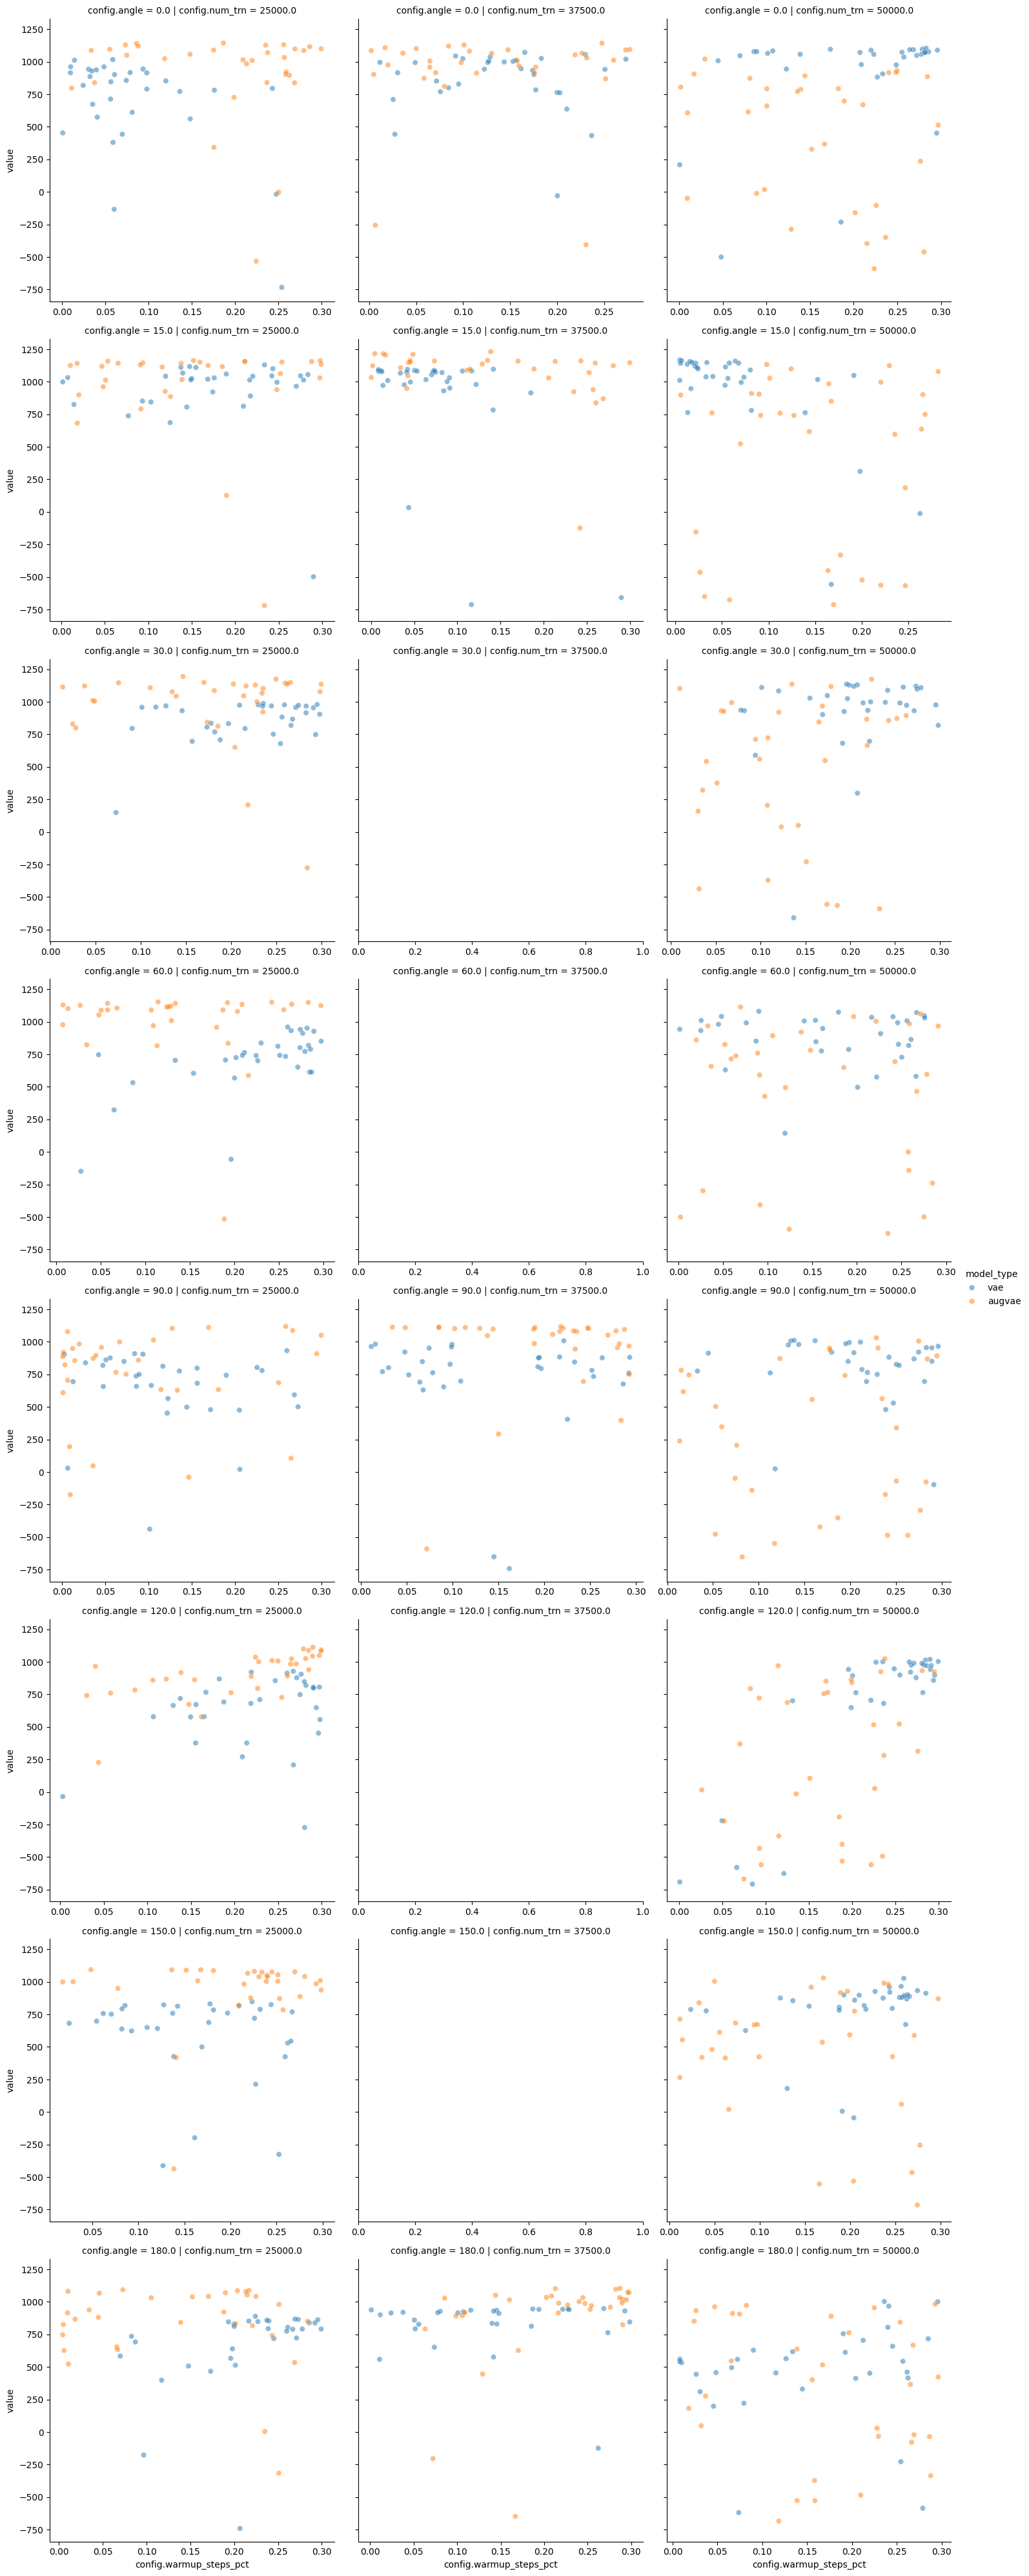

In [27]:
sns.relplot(
    data=df[df.metric == 'summary.valid/elbo'],
    x="config.warmup_steps_pct",
    y="value",
    row="config.angle", col='config.num_trn', hue='model_type',
    kind="scatter",
    facet_kws={'sharex': False},
    alpha=0.5)

Doesn't seem to have a big impact. Perhaps just fix at 0.1? OR have 0.1 and 0.25?

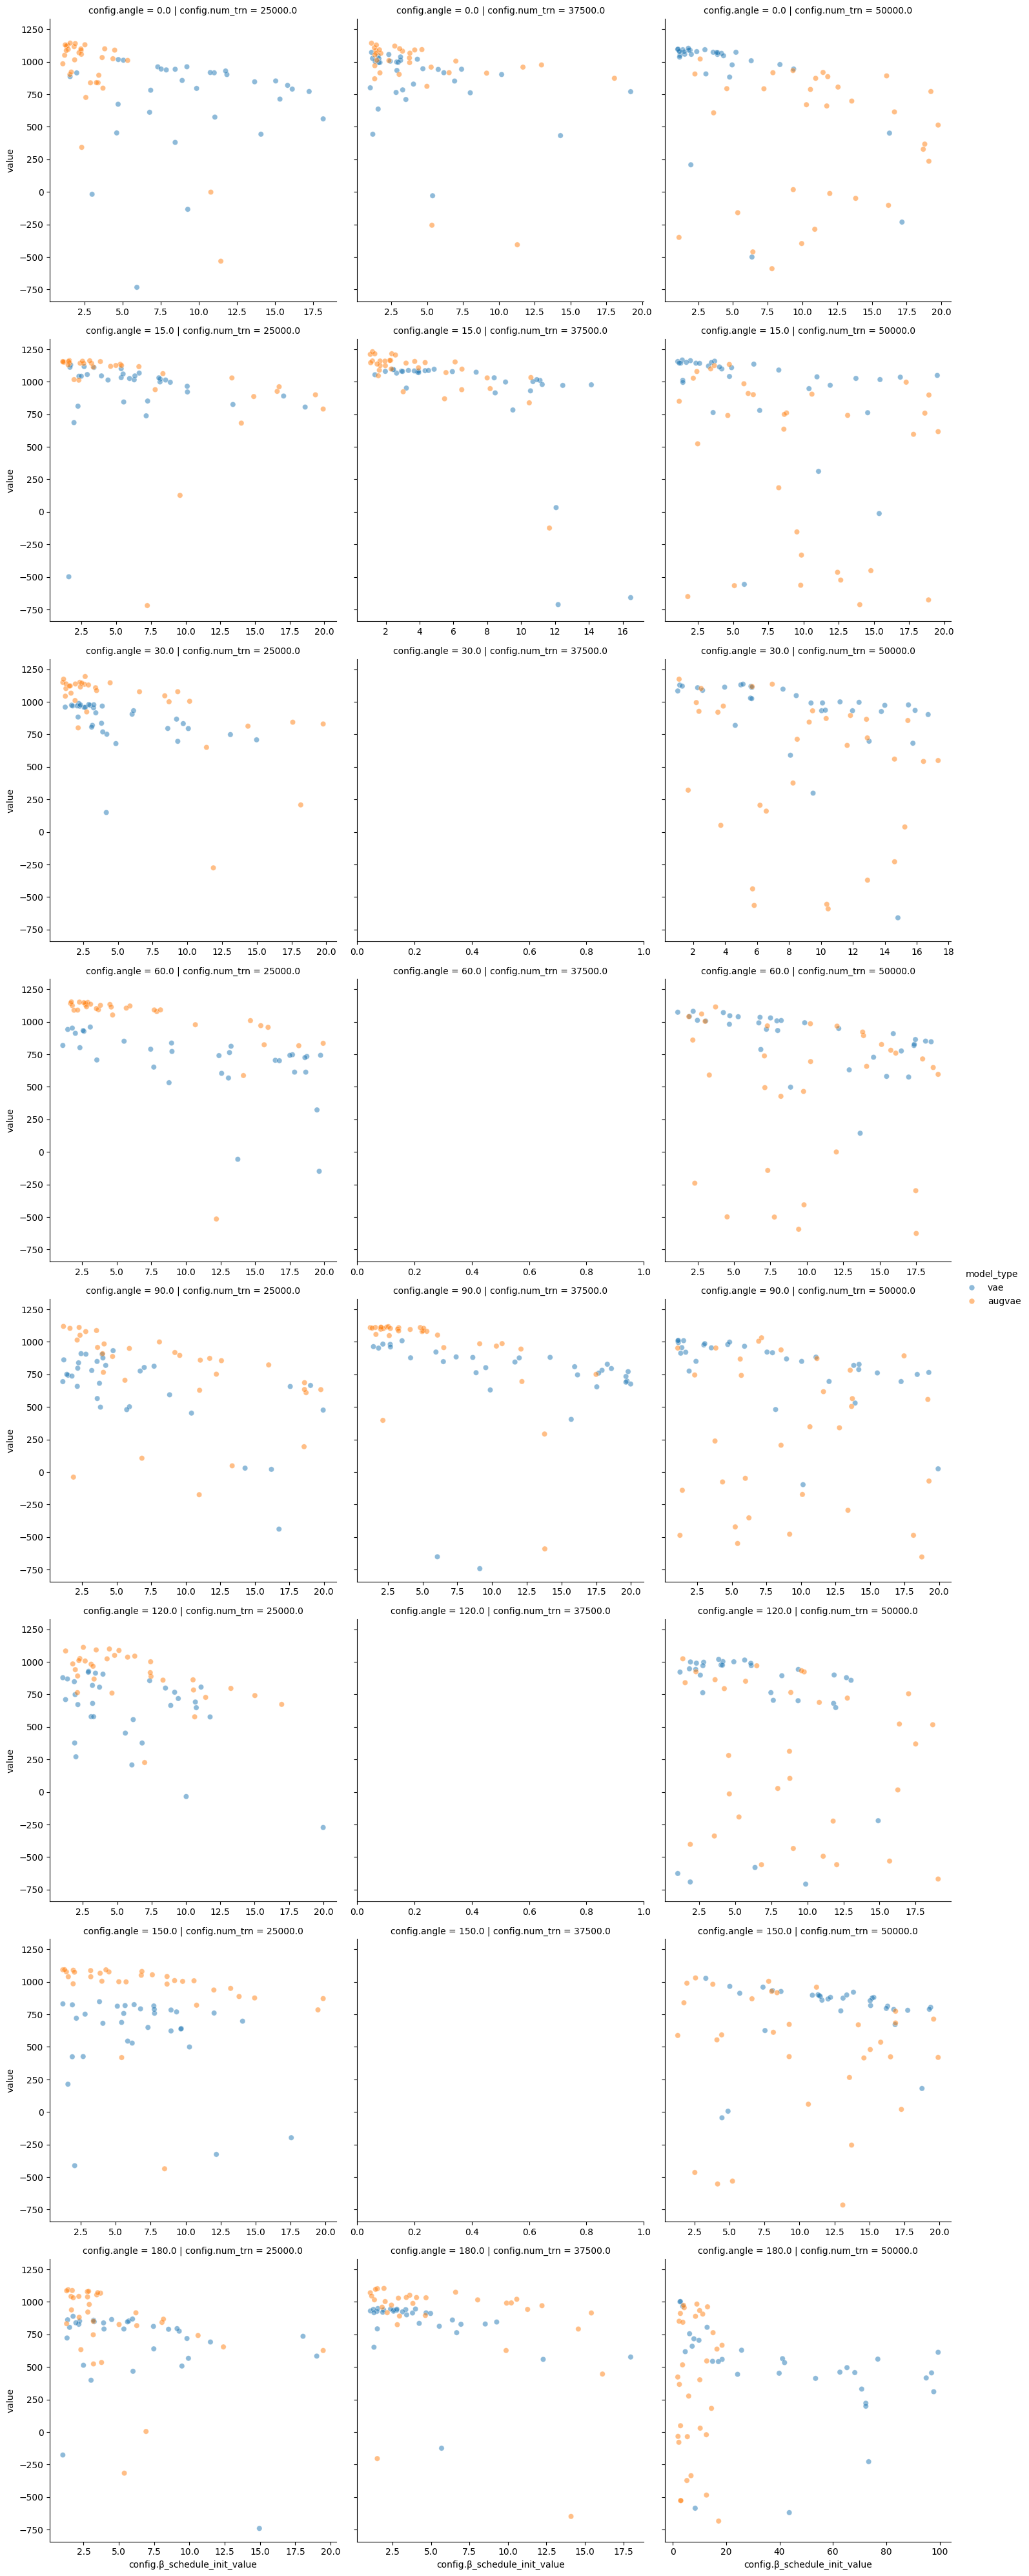

In [24]:
sns.relplot(
    data=df[df.metric == 'summary.valid/elbo'],
    x="config.β_schedule_init_value",
    y="value",
    row="config.angle", col='config.num_trn', hue='model_type',
    kind="scatter",
    facet_kws={'sharex': False},
    alpha=0.5)

For all angles, models, and amount of training data, we see that lower initial β values are better -> Remove from sweep.

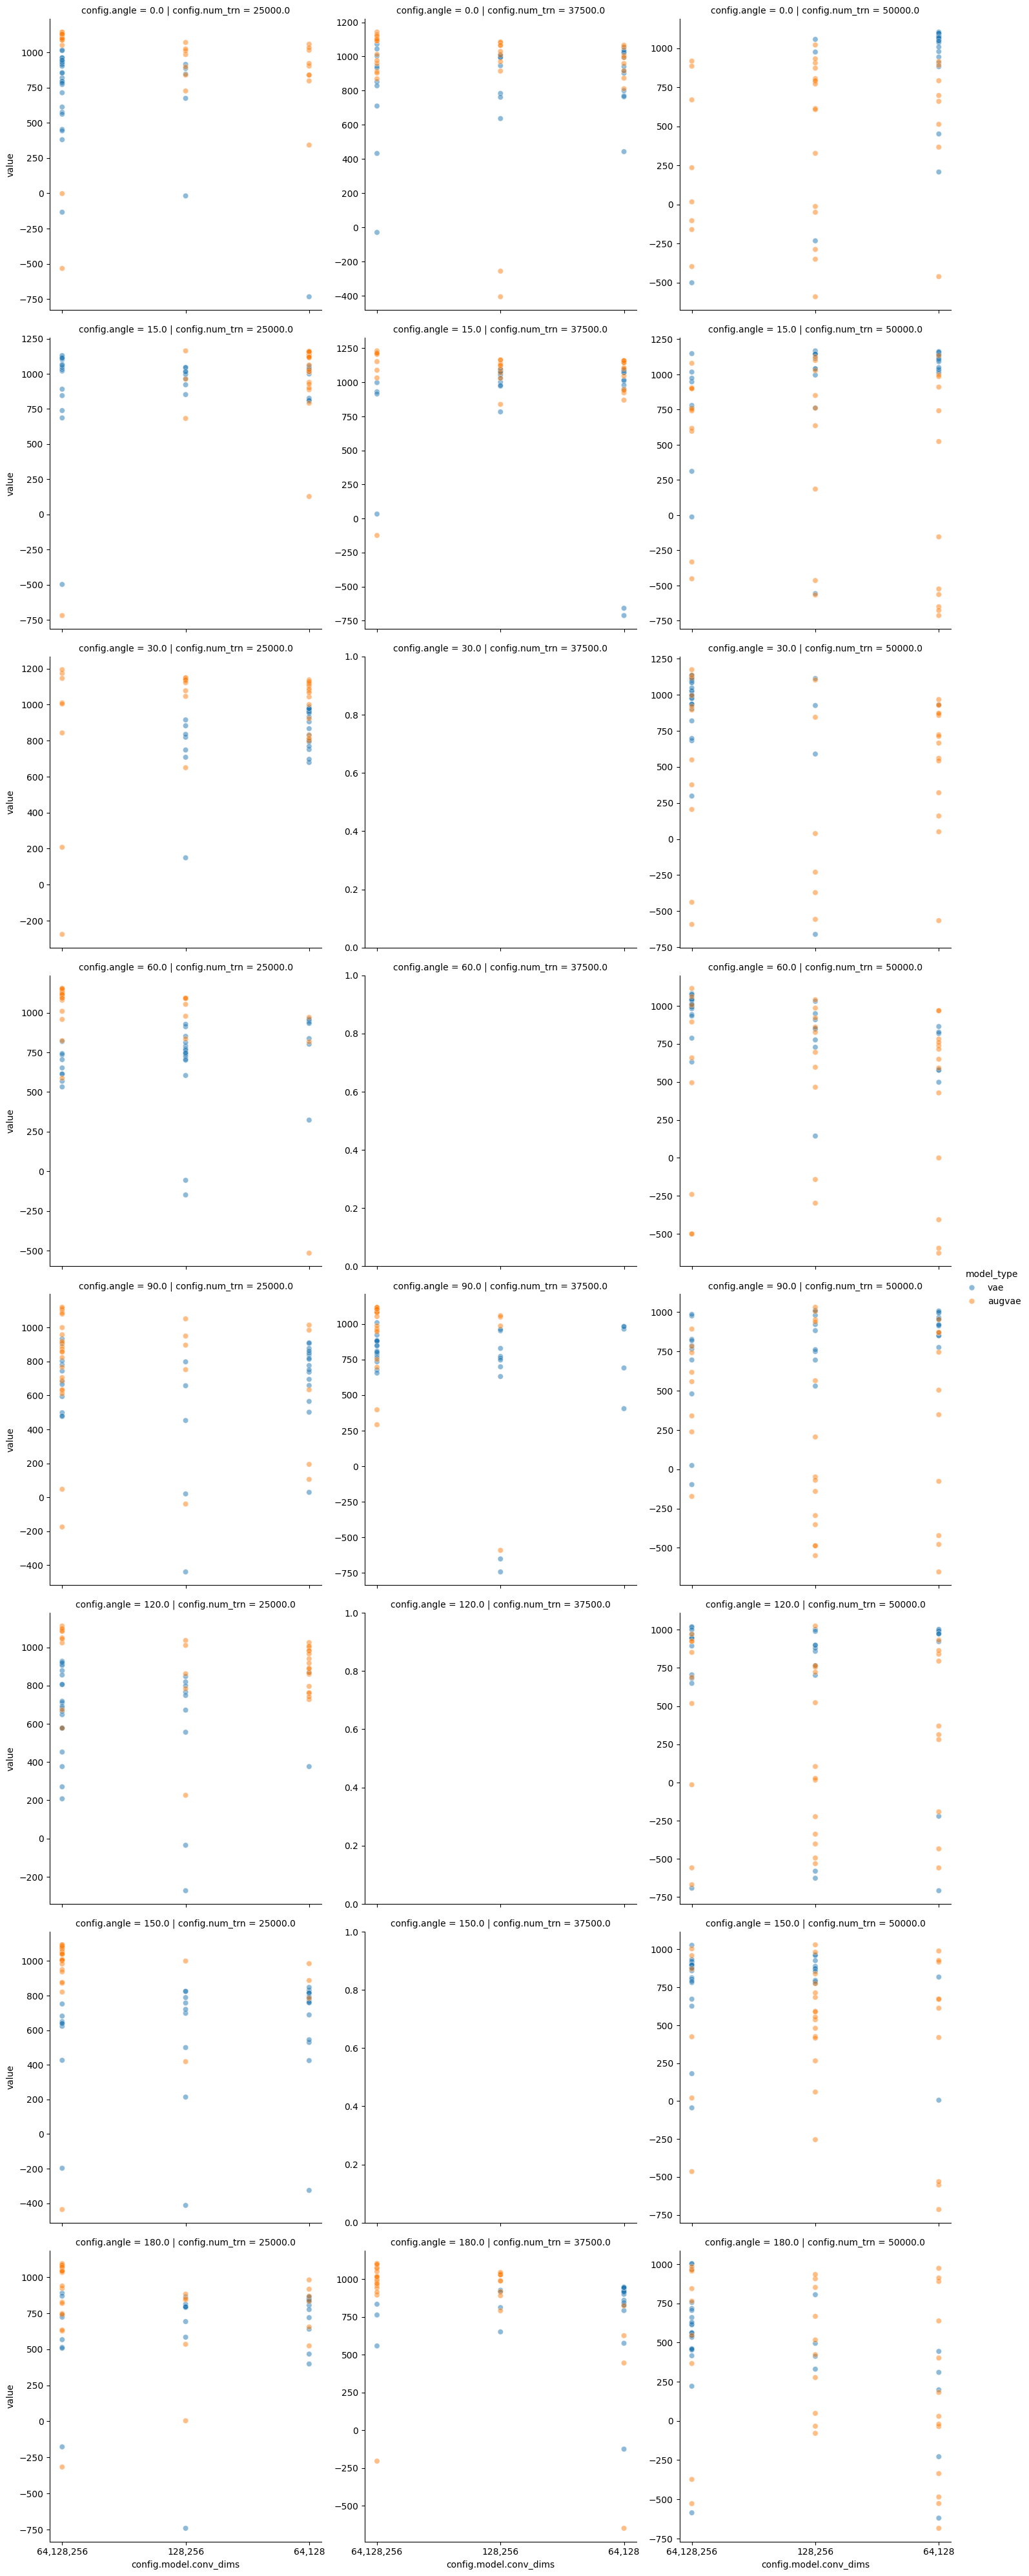

In [31]:
sns.relplot(
    data=df[df.metric == 'summary.valid/elbo'],
    x="config.model.conv_dims",
    y="value",
    row="config.angle", col='config.num_trn', hue='model_type',
    kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    alpha=0.5)

Here it looks like we should either remove medium or small, not sure which though. Perhaps it doesn't matter. 

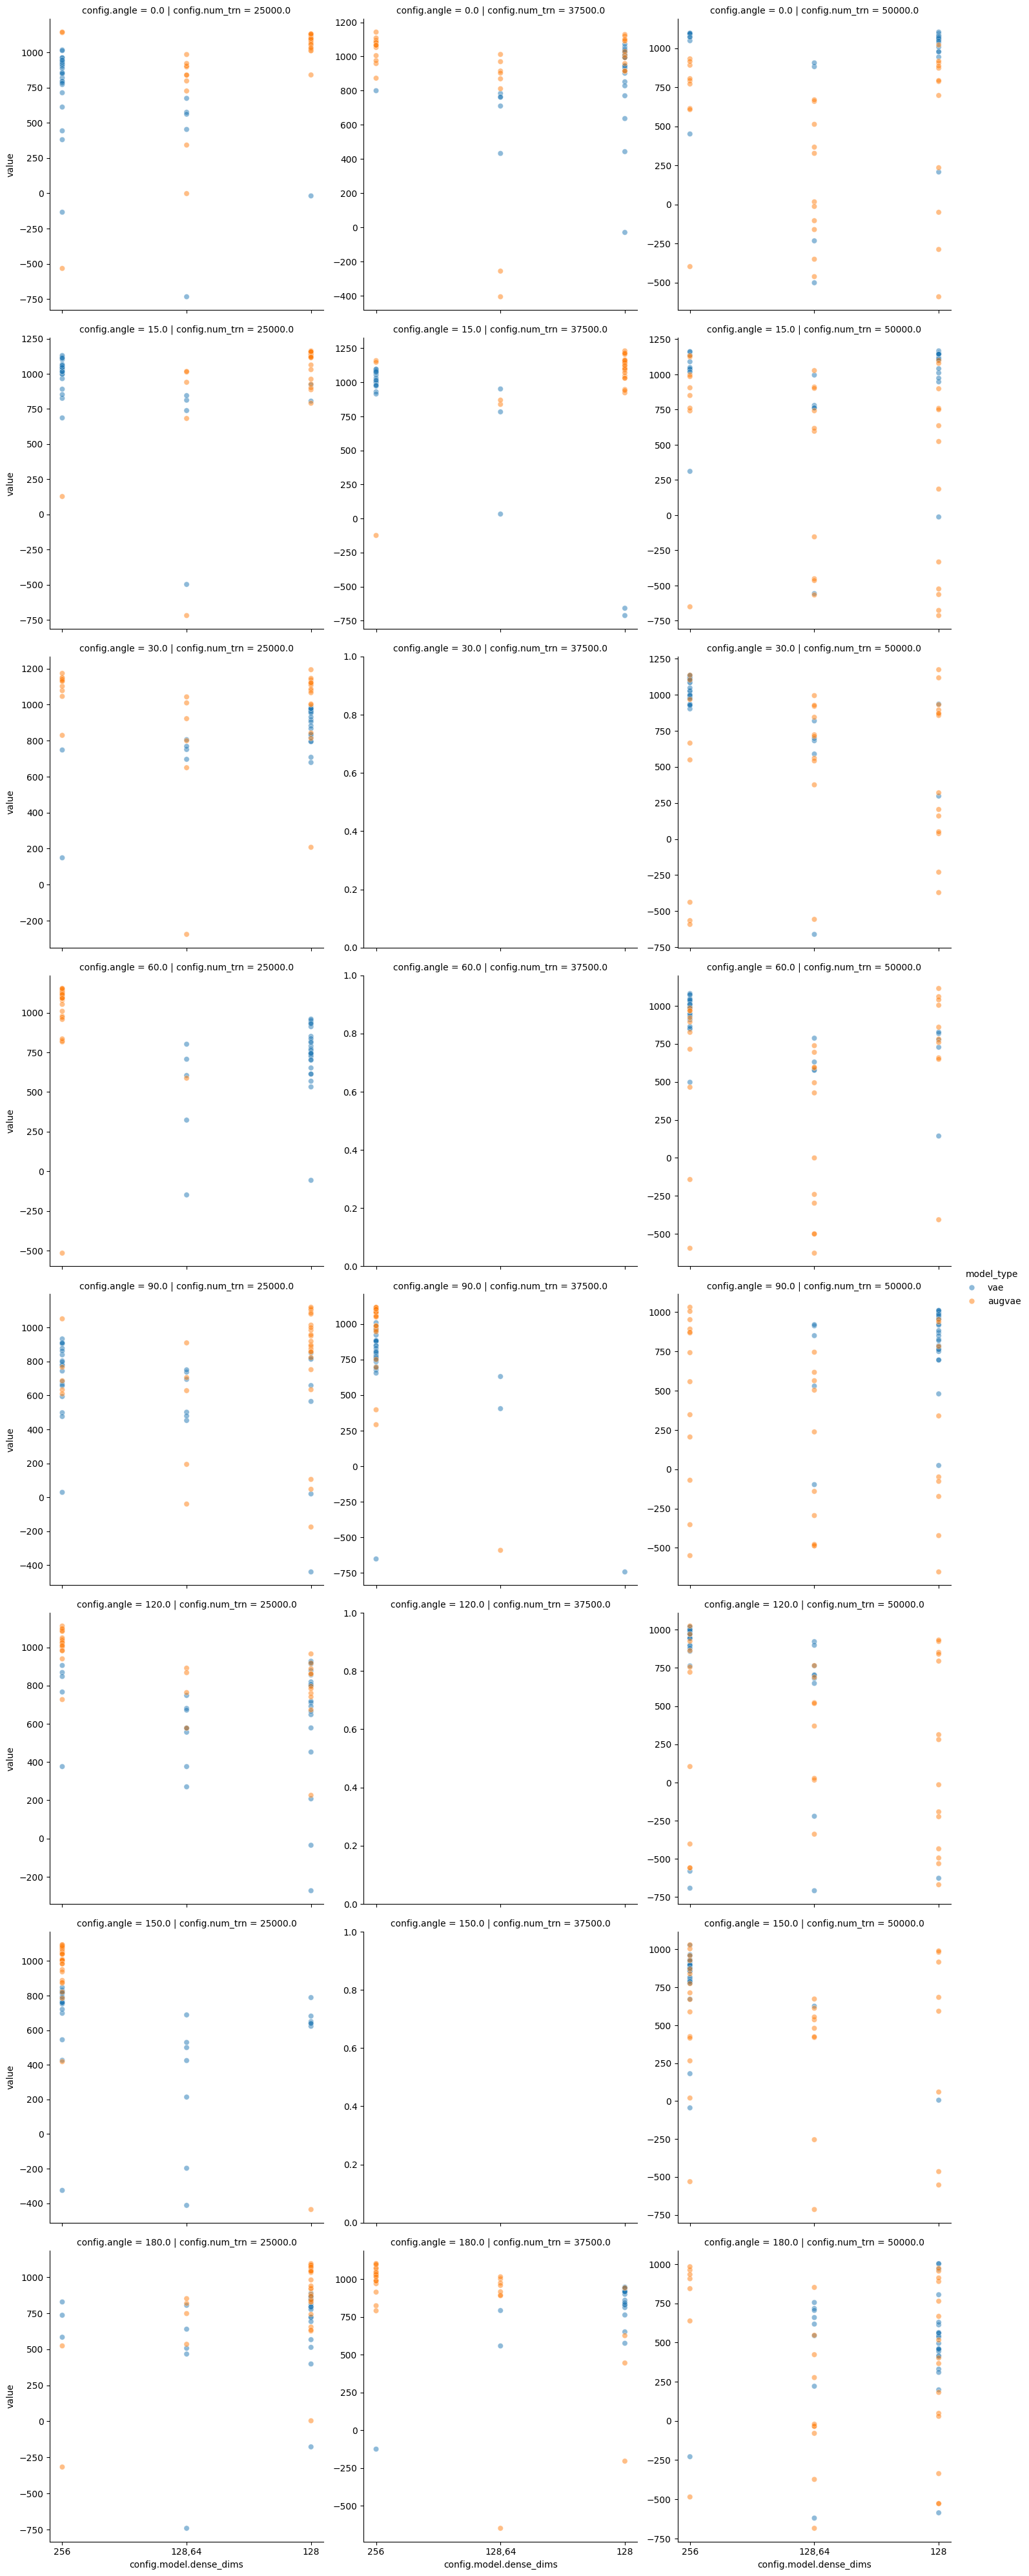

In [32]:
sns.relplot(
    data=df[df.metric == 'summary.valid/elbo'],
    x="config.model.dense_dims",
    y="value",
    row="config.angle", col='config.num_trn', hue='model_type',
    kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    alpha=0.5)

Here we can remove the 128,64 option, since it always performs worse than 256 and 128. Could we possibly also remove either 256 or 128?

Do we need to do a sweep per angle? Or can we just do one sweep for all angles? Let's compare the variance under angles to the variance under num_trn.

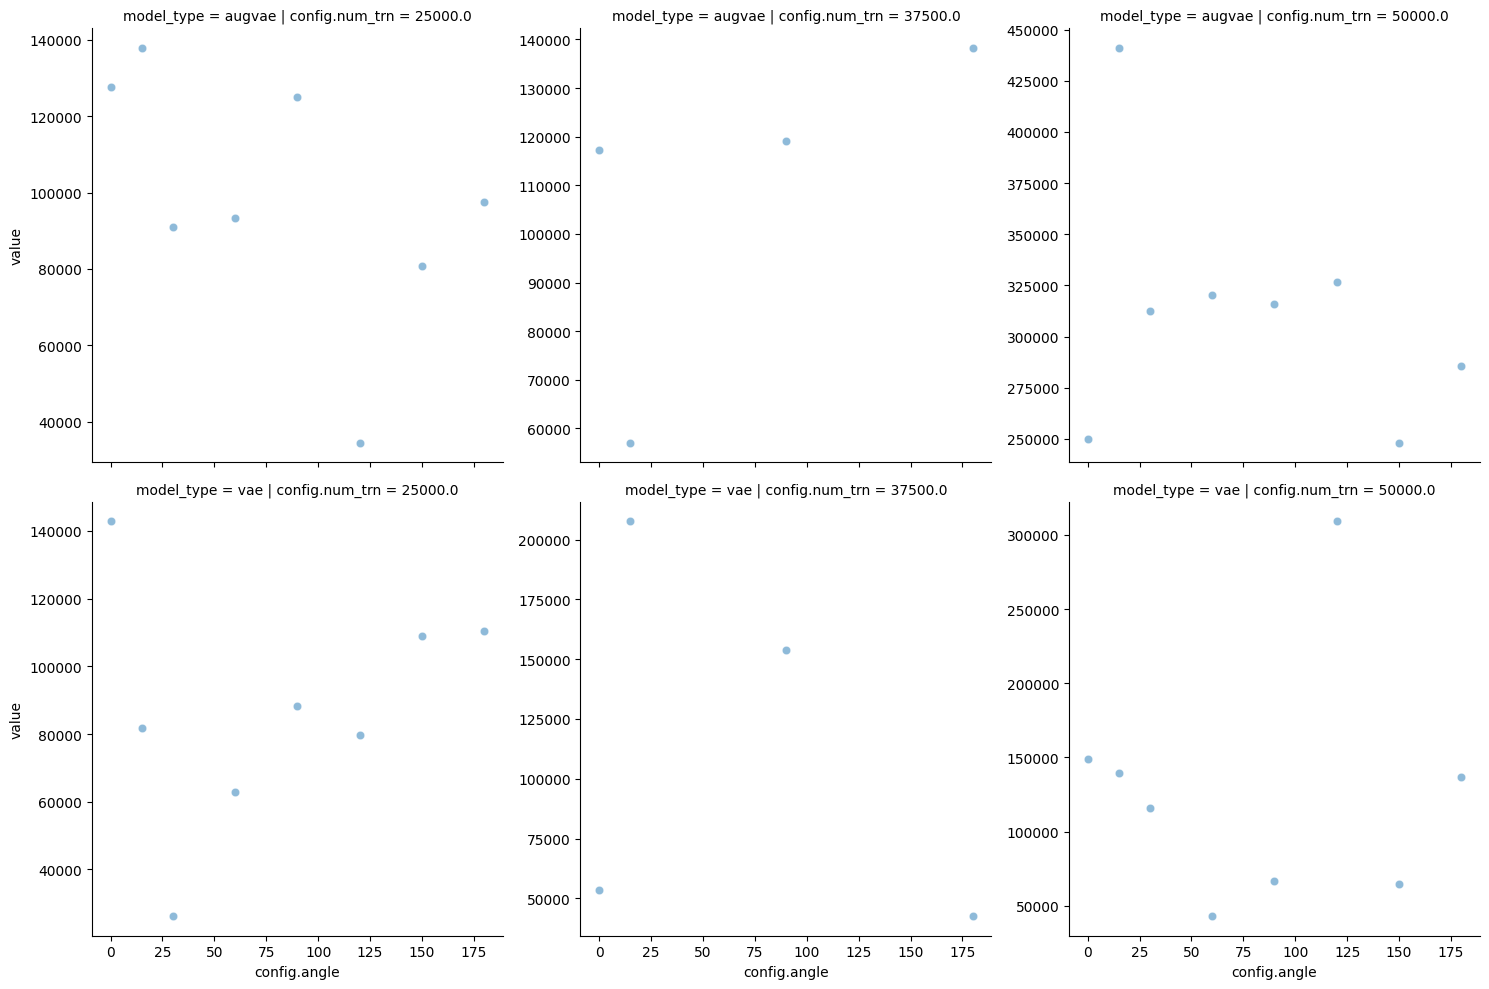

In [41]:
# get the variance in elbo for each sweep
var_df = df[df.metric == 'summary.valid/elbo'][['config.angle', 'config.num_trn', 'model_type', 'value']].groupby(['config.angle', 'config.num_trn', 'model_type']).var()

# compare the variaces in a sns plot
sns.relplot(
    data=var_df.reset_index(),
    x="config.angle",
    y="value",
    col="config.num_trn", row='model_type',
    kind="scatter",
    facet_kws={'sharey': False},
    alpha=0.5)

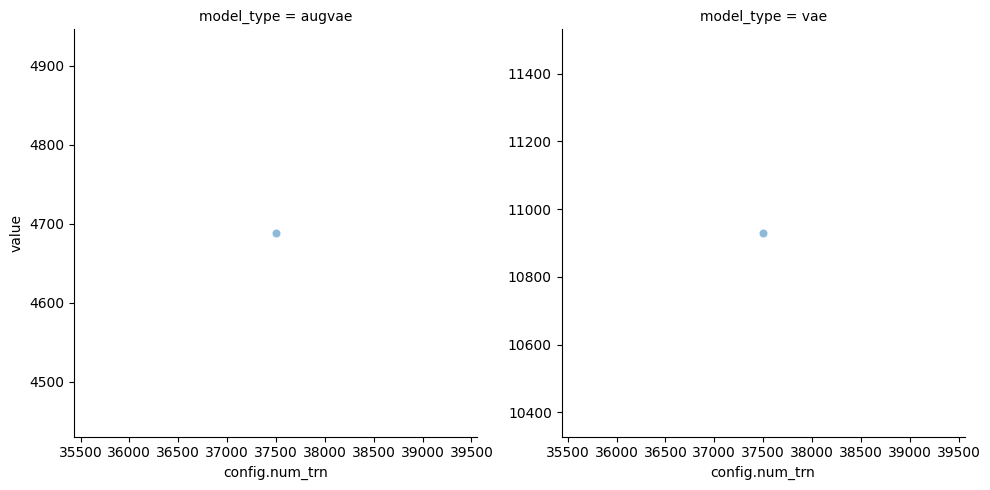

In [53]:
# get the variance in elbo for each sweep
var_df = (df[df.metric == 'summary.valid/elbo'][['config.angle', 'config.num_trn', 'model_type', 'value']]
          .groupby(['config.angle', 'model_type']).mean()
          .groupby(['config.num_trn', 'model_type']).var()
          .reset_index()
)

sns.relplot(
    data=var_df,
    x="config.num_trn",
    y="value",
    col="model_type",
    kind="scatter",
    facet_kws={'sharey': False},
    alpha=0.5)

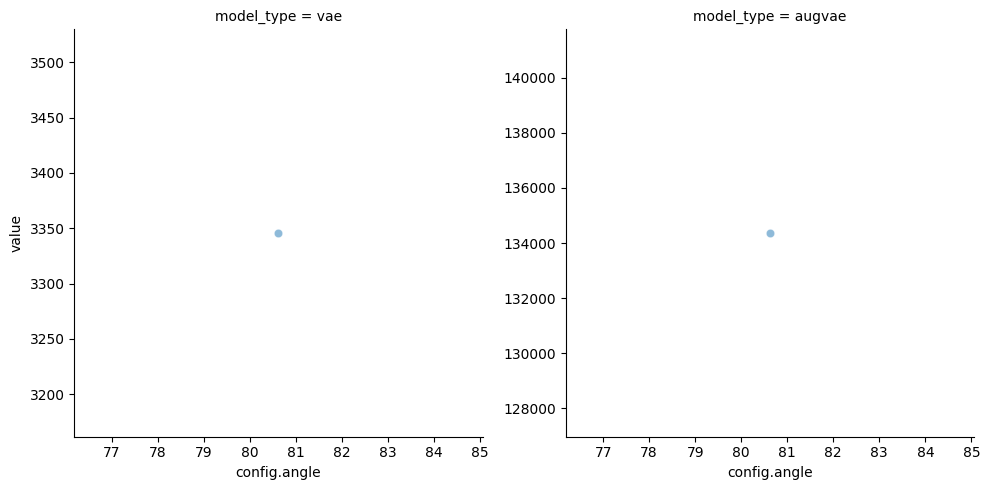

In [54]:
# get the variance in elbo for each sweep
var_df = (df[df.metric == 'summary.valid/elbo'][['config.angle', 'config.num_trn', 'model_type', 'value']]
          .groupby(['config.num_trn', 'model_type']).mean()
          .groupby(['config.angle', 'model_type']).var()
          .reset_index()
)

sns.relplot(
    data=var_df,
    x="config.angle",
    y="value",
    col="model_type",
    kind="scatter",
    facet_kws={'sharey': False},
    alpha=0.5)

From the above plots, it seems that there is just as much variance due to angles as there is due to the amount of training. This suggests that we must weep over both.